# Backtests the SMA Strategy Class

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("seaborn")

## Building the SMA Backtester Class 

In [83]:
class SMA():
    
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None

In [84]:
tester = SMA("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [85]:
tester.ticker

'AUDEUR=X'

In [86]:
tester.SMA_long

'2020-06-30'

In [87]:
tester.results

## Method get_data()

In [88]:
data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date") # importing data
data

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [89]:
data = data["AUDEUR=X"].to_frame().dropna() # selecting an instrument
data

,AUDEUR=X
Date,
2004-01-01,0.59780
2004-01-02,0.60314
2004-01-05,0.60467
2004-01-06,0.60350
2004-01-07,0.60728
...,...
2020-06-24,0.61349
2020-06-25,0.60938
2020-06-26,0.61373


In [90]:
data = data.loc["2010-01-01":"2012-12-31"].copy() # setting time period 
data

,AUDEUR=X
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060
...,...
2012-12-25,0.78620
2012-12-26,0.78680
2012-12-27,0.78340


In [91]:
data.rename(columns={"AUDEUR=X": "price"}, inplace=True) # clean up

In [92]:
data

,price
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060
...,...
2012-12-25,0.78620
2012-12-26,0.78680
2012-12-27,0.78340


In [93]:
data["returns"] = np.log(data / data.shift(1)) # calculate log returns

In [94]:
data["SMA_short"] = data["price"].rolling(50).mean() # add short sma
data["SMA_long"] = data["price"].rolling(200).mean() # add long sma

In [95]:
data

,price,returns,SMA_short,SMA_long
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN
...,...,...,...,...
2012-12-25,0.78620,-0.002921,0.803610,0.805435
2012-12-26,0.78680,0.000763,0.803618,0.805410
2012-12-27,0.78340,-0.004331,0.803462,0.805372


In [96]:
class SMA():
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        ''' Imports the data from the specified source
        '''
        data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        data[self.ticker].to_frame().dropna()
        data = data.loc[self.start:self.end].copy()
        data.rename(columns = {self.ticker: "price"}, inplace = True)
        data["returns"] = np.log(data.price.div(data.price.shift(1)))
        self.data = data 
    

In [130]:
tester = SMA("AUDEUR=X", "2010-01-01", "2019-12-31", 50, 200)

In [131]:
tester.data

,price,EURUSD=X,USDGBP=X,returns
Date,,,,
2010-01-01,0.62402,1.438994,0.61985,NaN
2010-01-04,0.63230,1.442398,0.62059,0.013182
2010-01-05,0.63430,1.436596,0.62536,0.003158
2010-01-06,0.63860,1.440403,0.62407,0.006756
2010-01-07,0.64060,1.431803,0.62759,0.003127
...,...,...,...,...
2019-12-25,0.62410,1.109016,0.77310,-0.000240
2019-12-26,0.62380,1.109545,0.77080,-0.000481
2019-12-27,0.62550,1.110112,0.76910,0.002722


In [99]:
tester.get_data()

## Setting new SMA Paramters

In [100]:
tester.SMA_short

50

In [101]:
tester.SMA_long

200

In [102]:
tester.data.isna().sum()

price       0
EURUSD=X    0
USDGBP=X    0
returns     1
dtype: int64

In [103]:
tester.SMA_long = 250

In [104]:
tester.SMA_long

250

In [105]:
tester.data.isna().sum()

price       0
EURUSD=X    0
USDGBP=X    0
returns     1
dtype: int64

In [141]:
class SMA():
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):
        ''' Imports the data from the specified source
        '''
        data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        data[self.ticker].to_frame().dropna()
        data = data.loc[self.start:self.end].copy()
        data.rename(columns = {self.ticker: "price"}, inplace = True)
        data["returns"] = np.log(data.price.div(data.price.shift(1)))
        self.data = data 
        return data
    
    def set_parameters(self, new_SMA_short = None, new_SMA_long = None):
        ''' Updates SMA parameters (SMA_short, SMA_long) and the prepared dataset
        '''
        if new_SMA_short is not None:
            self.SMA_short = new_SMA_short
            self.data["SMA_short"] = self.data["price"].rolling(self.SMA_short).mean()
            
        if new_SMA_long is not None:
            self.SMA_long = new_SMA_long
            self.data["SMA_long"] = self.data["price"].rolling(self.SMA_long).mean()

In [142]:
tester = SMA("AUDEUR=X", "2010-01-01", "2019-12-31", 50, 200,)

In [143]:
tester.data.isna().sum()

price       0
EURUSD=X    0
USDGBP=X    0
returns     1
dtype: int64

In [109]:
tester.set_parameters(25, 150)

In [110]:
tester.SMA_short

25

In [111]:
tester.data.isna().sum()

price          0
EURUSD=X       0
USDGBP=X       0
returns        1
SMA_short     24
SMA_long     149
dtype: int64

## Testing a Strategy & Splitting get_data() and add prepare_data()

In [150]:
class SMA():
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data()

    def get_data(self):
        ''' Imports the data from the specified source
        '''
        data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        data[self.ticker].to_frame().dropna()
        data = data.loc[self.start:self.end].copy()
        data.rename(columns = {self.ticker: "price"}, inplace = True)
        data["returns"] = np.log(data.price.div(data.price.shift(1)))
        self.data = data 
        return data
    
    def prepare_data(self):
        ''' Prepares the data for SMA trading strategy backtesting
        '''
        data = self.data.copy()
        data["SMA_short"] = data["price"].rolling(self.SMA_short).mean()
        data["SMA_long"] = data["price"].rolling(self.SMA_long).mean()
        self.data = data 
    
    def set_parameters(self, new_SMA_short = None, new_SMA_long = None):
        ''' Updates SMA parameters (SMA_short, SMA_long) and the prepared dataset
        '''
        if new_SMA_short is not None:
            self.SMA_short = new_SMA_short
            self.data["SMA_short"] = self.data["price"].rolling(self.SMA_short).mean()
            
        if new_SMA_long is not None:
            self.SMA_long = new_SMA_long
            self.data["SMA_long"] = self.data["price"].rolling(self.SMA_long).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_short"] > data["SMA_long"], 1, -1)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        performance = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperformance = performance - data["creturns"].iloc[-1] # out/underperformance of strategy
        
        return round(performance, 6), round(outperformance, 6)

In [152]:
tester = SMA("EURUSD=X", "2004-01-01", "2020-06-30", 50, 200,)


In [153]:
tester.test_strategy()

(1.278635, 0.362809)

In [154]:
tester.data

,AUDEUR=X,price,USDGBP=X,returns,SMA_short,SMA_long
Date,,,,,,
2004-01-01,0.59780,1.258194,0.56016,NaN,NaN,NaN
2004-01-02,0.60314,1.258194,0.55751,0.000000,NaN,NaN
2004-01-05,0.60467,1.268698,0.55334,0.008313,NaN,NaN
2004-01-06,0.60350,1.272103,0.54906,0.002681,NaN,NaN
2004-01-07,0.60728,1.264095,0.55012,-0.006315,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,0.61349,1.131235,0.79841,0.002892,1.101794,1.103973
2020-06-25,0.60938,1.125087,0.80561,-0.005449,1.102486,1.104053
2020-06-26,0.61373,1.122208,0.80480,-0.002562,1.103213,1.104122


In [155]:
tester.results

,AUDEUR=X,price,USDGBP=X,returns,SMA_short,SMA_long,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2004-10-07,0.59147,1.229906,0.56101,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,0.59207,1.241003,0.55704,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,0.59252,1.238405,0.55596,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,0.59154,1.232104,0.55832,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,0.58768,1.234903,0.55763,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,0.61349,1.131235,0.79841,0.002892,1.101794,1.103973,-1,-0.002892,0.921130,1.271272
2020-06-25,0.60938,1.125087,0.80561,-0.005449,1.102486,1.104053,-1,0.005449,0.916125,1.278218
2020-06-26,0.61373,1.122208,0.80480,-0.002562,1.103213,1.104122,-1,0.002562,0.913781,1.281497


## Plotting the results

In [157]:
class SMA():
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data()

    def get_data(self):
        ''' Imports the data from the specified source
        '''
        data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        data[self.ticker].to_frame().dropna()
        data = data.loc[self.start:self.end].copy()
        data.rename(columns = {self.ticker: "price"}, inplace = True)
        data["returns"] = np.log(data.price.div(data.price.shift(1)))
        self.data = data 
        return data
    
    def prepare_data(self):
        ''' Prepares the data for SMA trading strategy backtesting
        '''
        data = self.data.copy()
        data["SMA_short"] = data["price"].rolling(self.SMA_short).mean()
        data["SMA_long"] = data["price"].rolling(self.SMA_long).mean()
        self.data = data 
    
    def set_parameters(self, new_SMA_short = None, new_SMA_long = None):
        ''' Updates SMA parameters (SMA_short, SMA_long) and the prepared dataset
        '''
        if new_SMA_short is not None:
            self.SMA_short = new_SMA_short
            self.data["SMA_short"] = self.data["price"].rolling(self.SMA_short).mean()
            
        if new_SMA_long is not None:
            self.SMA_long = new_SMA_long
            self.data["SMA_long"] = self.data["price"].rolling(self.SMA_long).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_short"] > data["SMA_long"], 1, -1)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        performance = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperformance = performance - data["creturns"].iloc[-1] # out/underperformance of strategy
        
        return round(performance, 6), round(outperformance, 6)
    
    def plot_results(self):
        ''' Plots the performance of the SMA trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = f"{self.ticker} | SMA short = {self.SMA_short} | SMA long = {self.SMA_long}"
            self.results[["creturns", "cstrategy"]].plot(title = title, figsize = (12, 8))   

In [158]:
tester = SMA("EURUSD=X", "2004-01-01", "2020-06-30", 50, 200)

In [159]:
tester.plot_results()

Run test_strategy() first.


In [160]:
tester.test_strategy()

(1.278635, 0.362809)

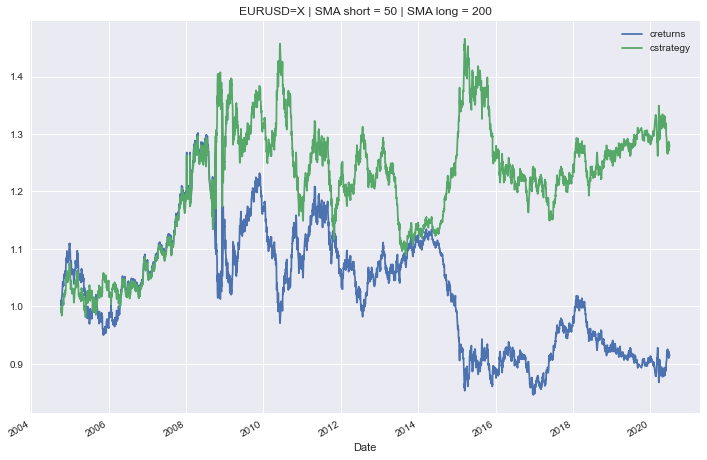

In [161]:
tester.plot_results()

## Strategy Optimization

In [162]:
tester.set_parameters(25, 150)

In [163]:
tester.test_strategy()[0]

1.681541

In [167]:
class SMA():
    def __init__(self, ticker, start, end, SMA_short, SMA_long):
        self.ticker = ticker
        self.SMA_short = SMA_short
        self.SMA_long = SMA_long
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        self.prepare_data()

    def get_data(self):
        ''' Imports the data from the specified source
        '''
        data = pd.read_csv("../forex_pairs.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        data[self.ticker].to_frame().dropna()
        data = data.loc[self.start:self.end].copy()
        data.rename(columns = {self.ticker: "price"}, inplace = True)
        data["returns"] = np.log(data.price.div(data.price.shift(1)))
        self.data = data 
        return data
    
    def prepare_data(self):
        ''' Prepares the data for SMA trading strategy backtesting
        '''
        data = self.data.copy()
        data["SMA_short"] = data["price"].rolling(self.SMA_short).mean()
        data["SMA_long"] = data["price"].rolling(self.SMA_long).mean()
        self.data = data 
    
    def set_parameters(self, new_SMA_short = None, new_SMA_long = None):
        ''' Updates SMA parameters (SMA_short, SMA_long) and the prepared dataset
        '''
        if new_SMA_short is not None:
            self.SMA_short = new_SMA_short
            self.data["SMA_short"] = self.data["price"].rolling(self.SMA_short).mean()
            
        if new_SMA_long is not None:
            self.SMA_long = new_SMA_long
            self.data["SMA_long"] = self.data["price"].rolling(self.SMA_long).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_short"] > data["SMA_long"], 1, -1)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        performance = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperformance = performance - data["creturns"].iloc[-1] # out/underperformance of strategy
        
        return round(performance, 6), round(outperformance, 6)
    
    def plot_results(self):
        ''' Plots the performance of the SMA trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = f"{self.ticker} | SMA short = {self.SMA_short} | SMA long = {self.SMA_long}"
            self.results[["creturns", "cstrategy"]].plot(title = title, figsize = (12, 8)) 
            
    def optimize_parameters(self, SMA_short_range, SMA_long_range):
        ''' Finds the optimal strategy given the SMA parameters.

        Parameters
        ----------
        SMA_short_range, SMA_long_range: int
            tuples of the form (start, end, step size)        
        '''
        
        combinations = list(product(range(*SMA_short_range), range(*SMA_long_range)))
        
        # test all combinations
        results = []
        for combination in combinations:
            self.set_parameters(combination[0], combination[1])
            results.append(self.test_strategy()[0])
        
        best_performance = np.max(results) # best performance
        optimal_parameters = combinations[np.argmax(results)] # optimal parameters
        
        # set and run the optimal strategy
        self.set_parameters(optimal_parameters[0], optimal_parameters[1])
        self.test_strategy()
                   
        # create a dataframe with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA", "dev"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return optimal_parameters, best_performance

In [168]:
tester = SMA("EURUSD=X", "2004-01-01", "2020-06-30", 50, 200)

In [169]:
tester.test_strategy()

(1.278635, 0.362809)

In [170]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

((47, 136), 2.709873)

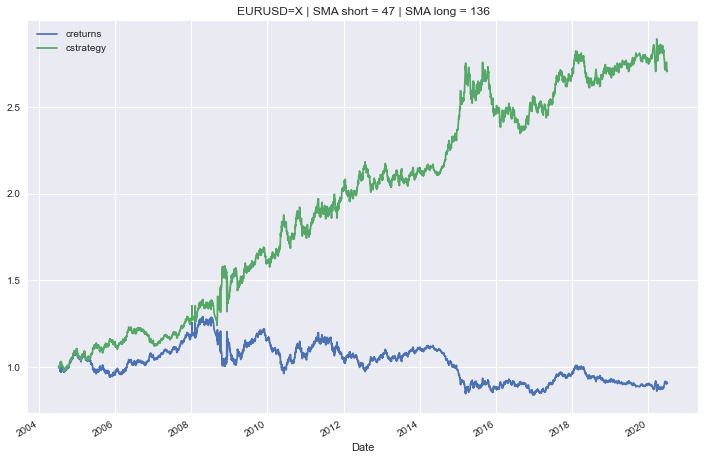

In [171]:
tester.plot_results()

In [172]:
tester.results_overview

,SMA,dev,performance
0,10,100,0.914260
1,10,101,0.914831
2,10,102,0.918843
3,10,103,0.920983
4,10,104,0.994311
...,...,...,...
6075,49,247,1.271927
6076,49,248,1.292483
6077,49,249,1.220091
6078,49,250,1.227455
